# Z PIEŃKOSZ Lending Club cześć1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. OBRÓBKA DANYCH

In [2]:
# wczytanie pliku z danymi
ld = pd.read_csv('Loan_data.csv')
# plil'loan_data.csv' jest już wstępnie oczyszczomy z headera i footera

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ld.shape

(42536, 151)

ELIMINACJA PUSTYCH KOMÓREK

In [5]:
# sprawdzenie ile jest pustych komórek w poszczególnych kolumnach
ld.isnull().sum().sort_values(ascending = False)

inq_fi                            42536
mths_since_recent_bc              42536
mths_since_recent_inq             42536
mths_since_recent_revol_delinq    42536
num_accts_ever_120_pd             42536
                                  ...  
fico_range_low                        1
application_type                      1
debt_settlement_flag                  1
dti                                   1
id                                    0
Length: 151, dtype: int64

In [6]:
ld2=ld.isnull().sum().sort_values(ascending = False)
# sprawdzenie rozkładu ilości kolumn z brakującymi rekordami
ld2.groupby(ld2).count()

0         1
1        39
5         2
14        1
30        8
84        1
91        1
106       1
146       2
1113      1
1366      1
2627      1
13294     1
26927     1
38885     1
39787     1
42376     6
42536    82
dtype: int64

In [7]:
# postanawiam usunąc kolumny w których brakuje co najmniej 10000 rekordów (t.j. >20%) co stanowi 92 kolumny
## uznaję, że jeśli brakuje aż tak dużo danych (nie były zbierane ?) to być może te etykiety nie są istotne

In [8]:
ld2=ld2.reset_index()
ld2

,index,0
0,inq_fi,42536
1,mths_since_recent_bc,42536
2,mths_since_recent_inq,42536
3,mths_since_recent_revol_delinq,42536
4,num_accts_ever_120_pd,42536
...,...,...
146,fico_range_low,1
147,application_type,1
148,debt_settlement_flag,1
149,dti,1


In [9]:
ld2.columns = ['description','count']
ld2.head()

,description,count
0,inq_fi,42536
1,mths_since_recent_bc,42536
2,mths_since_recent_inq,42536
3,mths_since_recent_revol_delinq,42536
4,num_accts_ever_120_pd,42536


In [10]:
ld2[ld2['count'] >= 10000].count()

description    92
count          92
dtype: int64

In [11]:
# oddzielam kolumny mające więcej niż 10000 brakujących wierszy
ld3 = ld2[ld2['count'] >= 10000]
ld3

,description,count
0,inq_fi,42536
1,mths_since_recent_bc,42536
2,mths_since_recent_inq,42536
3,mths_since_recent_revol_delinq,42536
4,num_accts_ever_120_pd,42536
...,...,...
87,settlement_date,42376
88,next_pymnt_d,39787
89,mths_since_last_record,38885
90,mths_since_last_delinq,26927


In [12]:
# tworzę listę do której zrzucę nazwy kolumn
usun = []
# len(ld3)
for i in range(len(ld3)):
    usun.append(ld3.iloc[i][0])

In [13]:
# usuwam 'hurtowo' kolumny przy pomocy listy 'us'
ld.drop(usun, axis = 1, inplace=True)
ld.shape
# zredukowałem do 59 kolumn

(42536, 59)

In [11]:
ld.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [12]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [14]:
#ld.isna().sum().sort_values

Teraz zajmę się poszczególnymi kolumnami, uzupełniając 'NaN', zera oraz konwertując na zmienne numeryczne 

In [15]:
# w kolumnie 'annual_inc' brakuje 4 wartości, a ten parametr może byc ważny przy kredytach
## ponieważ brakujące wartości mogą mieć duży rozrzut, wolę te wiersze usunąc niż wypełniać
ld.dropna(axis = 0, subset = ['annual_inc'], inplace=True)

In [16]:
ld.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42531.000000,42531.000000,42531.000000,42531.000000,4.253100e+04,42531.000000,42506.000000,42531.000000,42531.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11090.173050,10822.011004,10140.582662,322.634879,6.913656e+04,13.374136,0.152449,713.045778,717.045778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7411.137529,7147.112309,7131.587121,208.933353,6.409635e+04,6.725675,0.512406,36.182535,36.182535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.710000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.275000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [17]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ld.isna().sum().sort_values

<bound method Series.sort_values of id                           0
member_id                42531
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_status        42371
settlement_date          42371
settlement_amount        42371
settlement_percentage    42371
settlement_term          42371
Length: 151, dtype: int64>

In [19]:
# informacje nt kwoty pozyczki są zawarte w trzech kolumnach i maja bardzo podobne wartości
ld[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,42531.000000,42531.000000,42531.000000
mean,11090.173050,10822.011004,10140.582662
std,7411.137529,7147.112309,7131.587121
min,500.000000,500.000000,0.000000
25%,5200.000000,5000.000000,4950.000000
50%,9700.000000,9600.000000,8500.000000
75%,15000.000000,15000.000000,14000.000000
max,35000.000000,35000.000000,35000.000000


In [20]:
ld.loan_amnt.corr(ld.funded_amnt)
# korelacja loan_amnt vs funded_amnt 0,98

0.9817450847661635

In [21]:
# mam niewystraczające informacje nt definicji danych (t.j. czym sie rózni 'funded_amnt') - dlatego przyjmuje po prostu, 
##  że kwata pożyczki to 'loan_amnt' a dwie pozostałe kolumny pominę

In [22]:
# uporządkuję kolumnę 'term'
ld['term'].value_counts()

 36 months    31530
 60 months    11001
Name: term, dtype: int64

In [23]:
# konwersja na wartości numeryczne
ld['term'].replace(to_replace = ' 36 months', value = 36, inplace = True) 
ld['term'].replace(to_replace = ' 60 months', value = 60, inplace = True)
ld['term'].value_counts()

36    31530
60    11001
Name: term, dtype: int64

In [24]:
# stworzę ramkę 'legenda' gdzie bede zapisawal zmiany wprowadzone w kolumnach
leg = {'description':{'term':'" 36 months":36.0, " 60 months":60.0'}}
legenda = pd.DataFrame(leg)
legenda.head()

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"


In [25]:
# uporządkuję kolumnę 'int_rate'
ld['int_rate'].value_counts()

 10.99%    970
 11.49%    837
 13.49%    832
  7.51%    787
  7.88%    742
          ... 
 17.41%      1
 24.40%      1
 16.20%      1
 18.72%      1
 17.46%      1
Name: int_rate, Length: 394, dtype: int64

In [26]:
# usunę '%' i konwertuje na wartości numeryczne
ld['int_rate'] = ld['int_rate'].str.strip('%').str.strip()
ld['int_rate'] = ld['int_rate'].map(lambda x: float(x))

In [27]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
leg_n = {'description':{'int_rate' : '[%]'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head()

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]


In [29]:
#sprawdze kolumne installment
ld.installment.sort_values()

41825      15.67
39613      15.69
41705      15.75
42418      15.76
42363      15.91
          ...   
8009     1288.10
11703    1288.10
15914    1295.21
16210    1302.69
12174    1305.19
Name: installment, Length: 42531, dtype: float64

In [30]:
# uporządkuję kolumnę 'grade'
ld['grade'].value_counts()

B    12389
A    10179
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [31]:
# zamieniam oznaczenia literowe na wartości numeryczne
ld['grade'] = ld['grade'].map({'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1})

In [32]:
leg_n = {'description':{'grade':'A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head()

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"


In [33]:
# uporządkuję kolumnę 'sub_grade'
#ld['sub_grade'].value_counts()
ld.sub_grade.unique()
# ponieważ jest dużo pozycji, aby zamienic na numeryczne skorzystam z gotowego narzędzia do enkodowania

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [35]:
ld['sub_grade_num'] = label_encoder.fit_transform(ld['sub_grade'])
ld.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [36]:
ld.sub_grade_num.unique()

array([ 6, 13, 14, 10,  9,  3, 20, 26, 12,  5, 15,  0,  7,  8, 11, 16,  2,
        4, 19,  1, 23, 17, 18, 27, 22, 28, 25, 24, 33, 21, 32, 31, 30, 29,
       34])

In [37]:
leg_n = {'description':{'sub_grade_num':'A1: 0, A2: 1,  ...,G4: 33, G5: 34'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head()

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"


In [38]:
#ld.info()

In [39]:
# sprawdzam czy kolumnę 'emp_title' można łatwo agregować 
ld.emp_title.value_counts()

US Army                    139
Bank of America            115
IBM                         72
Kaiser Permanente           61
AT&T                        61
                          ... 
Quail Tools                  1
Adil System                  1
Doubletree Papermills        1
dhl express                  1
Herb's Pool Service Inc      1
Name: emp_title, Length: 30658, dtype: int64

In [40]:
# usuwam kolumnę 'emp_title' - nie będzie przydatna bo zawiera dużo uniklanych (i.e przypadkowych) wpisów
ld.drop(['emp_title'], axis = 1, inplace=True)

In [41]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,sub_grade_num
0,1077501,NaN,5000.0,5000.0,4975.0,36,10.65,162.87,6,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,6
1,1077430,NaN,2500.0,2500.0,2500.0,60,15.27,59.83,5,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,13
2,1077175,NaN,2400.0,2400.0,2400.0,36,15.96,84.33,5,C5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,14
3,1076863,NaN,10000.0,10000.0,10000.0,36,13.49,339.31,5,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,10
4,1075358,NaN,3000.0,3000.0,3000.0,60,12.69,67.79,6,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,9


In [42]:
# sprawdzam czy kolumnę 'emp_length' można łatwo agregować 
ld.emp_length.value_counts()

10+ years    9369
< 1 year     5058
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [43]:
ld.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [44]:
# brakuje 1112 wartości (nan), co stanowi 2,6 % zbioru - niewielkie znaczenie - uzupełniam średnią ('5 years')
ld['emp_length'].fillna('5 years', inplace = True)

In [45]:
# konwertuje na wartości numeryczne
ld['emp_length'].replace(to_replace = '< 1 year', value = '0 years', inplace = True)
ld['emp_length'].replace(to_replace = '1 year', value = '1 years', inplace = True)
ld['emp_length'].replace(to_replace = '10+ years', value = '10 years', inplace = True)

In [46]:
ld['emp_length'] = ld['emp_length'].str.strip(' years').str.strip()
ld['emp_length'] = ld['emp_length'].map(lambda x: float(x))

In [47]:
ld.emp_length.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [48]:
# dodaję do ramki
leg_n = {'description':{'emp_length':'< 1 year: 0,  ...,10+years: 10'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head()

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"


In [49]:
# sprawdzam czy kolumnę 'home_ownership' można łatwo agregować 
ld.home_ownership.value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            4
Name: home_ownership, dtype: int64

In [50]:
ld.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [51]:
ld['home_ownership'] = ld['home_ownership'].map({'OWN': 5, 'MORTGAGE': 4, 'RENT': 3, 'OTHER': 2, 'NONE': 1})

In [52]:
ld.home_ownership.unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [53]:
# dodaję do ramki
leg_n = {'description':{'home_ownership':'NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(8)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"


In [54]:
# sprawdzam czy kolumnę 'verification_status' można łatwo agregować 
ld.verification_status.value_counts()

Not Verified       18754
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [55]:
ld.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [56]:
# zamieniam opisy na wartości numeryczne
ld['verification_status'].replace(to_replace = 'Not Verified', value = 1, inplace = True)
ld['verification_status'].replace(to_replace = 'Source Verified', value = 2, inplace = True)
ld['verification_status'].replace(to_replace = 'Verified', value = 3, inplace = True)

In [57]:
ld.verification_status.unique()

array([3, 2, 1], dtype=int64)

In [58]:
leg_n = {'description':{'verification_status':'Not Verified: 1, Source Verified: 2, Verified: 3'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(10)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"
verification_status,"Not Verified: 1, Source Verified: 2, Verified: 3"


In [59]:
# sprawdzam kolumne 'loan_status'
ld['loan_status'].value_counts()


Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1984
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [60]:
# dane z komentarzem 'Does not meet.. ' stanowią małą część zbioru (6%) - postawiam je zintegrować z pozostałymi
# całość zamieniam na numeryczne
# zakladam, że to sa nasze wartości klasyfikacyjne: 'Fully Paid' - pożyczkoriorca spłacił, 'Charged Off' - nie spłacił
ld['loan_status'].replace(to_replace = ['Does not meet the credit policy. Status:Fully Paid',
                                        'Fully Paid'], value = 1, inplace = True)
ld['loan_status'].replace(to_replace = ['Does not meet the credit policy. Status:Charged Off',
                                        'Charged Off'], value = 0, inplace = True)

In [61]:
leg_n = {'description':{'loan_status':'Fully Paid: 1, Charged Off: 0'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(10)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"
verification_status,"Not Verified: 1, Source Verified: 2, Verified: 3"
loan_status,"Fully Paid: 1, Charged Off: 0"


In [62]:
# sprawdzam czy kolumnę 'pymnt_plan' można łatwo agregować 
ld.pymnt_plan.unique()
# tylko jedna wartość - tą kolumnę pominę

array(['n'], dtype=object)

In [63]:
ld['url'].value_counts() 
# uniklane wartości , to sie do niczego nie przyda. tę kolumne pomijam

https://lendingclub.com/browse/loanDetail.action?loan_id=369078     1
https://lendingclub.com/browse/loanDetail.action?loan_id=532300     1
https://lendingclub.com/browse/loanDetail.action?loan_id=656520     1
https://lendingclub.com/browse/loanDetail.action?loan_id=743343     1
https://lendingclub.com/browse/loanDetail.action?loan_id=417817     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=1009492    1
https://lendingclub.com/browse/loanDetail.action?loan_id=581481     1
https://lendingclub.com/browse/loanDetail.action?loan_id=705174     1
https://lendingclub.com/browse/loanDetail.action?loan_id=650502     1
https://lendingclub.com/browse/loanDetail.action?loan_id=800340     1
Name: url, Length: 42531, dtype: int64

In [64]:
# kolumna 'purpose'
sorted(ld.purpose.unique().tolist())

['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

In [65]:
# zamieniam na numeryczne
ld['purpose_num'] = label_encoder.fit_transform(ld['purpose']) # zmienić typ encodera ?
ld.purpose_num.unique()

array([ 1,  0, 11,  9, 13,  2,  4,  6,  7,  8, 12,  5, 10,  3])

In [66]:
# sprawdzam
#ld[['purpose', 'purpose_num']]

In [67]:
leg_n = {'description':{'purpose_num': 'car: 0, credit_c: 1, debt_c: 2, edu: 3, home_i: 4, house: 5, major_p: 6, medical: 7,moving: 8, other: 9, ren_en: 10, small_bus: 11, vacation: 12, wedding: 13'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(10)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"
verification_status,"Not Verified: 1, Source Verified: 2, Verified: 3"
loan_status,"Fully Paid: 1, Charged Off: 0"
purpose_num,"car: 0, credit_c: 1, debt_c: 2, edu: 3, home_i..."


In [68]:
# sprawdzam czy kolumnę 'title' można łatwo agregować 
ld.title.unique()
#ld.title.value_counts()
# w tej kolumnie jest dużo wartości, 13 brakujących  i raczej wtórne do danych z kolumny 'purpose' - pomijam

array(['Computer', 'bike', 'real estate business', ..., 'delight',
       'Car repair bill', 'Aroundthehouse'], dtype=object)

In [69]:
# sprawdzam czy kolumnę 'zip_code' można łatwo agregować 
#ld.zip_code.unique()
# pomijam

In [70]:
# sprawdzam czy kolumnę 'addr_state' można łatwo agregować
ld.addr_state.unique()
# mam watpliwości, czy będzie jakaś korelacja, ale zostawiam

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [71]:
# zamieniam na numeryczne
ld['addr_state_num'] = label_encoder.fit_transform(ld['addr_state']) # zmienić typ encodera ?
ld.addr_state_num.unique()

array([ 3, 10, 14,  4, 36, 27, 42, 44, 24,  6, 43,  9, 33, 37, 23, 30, 17,
       34, 39, 38, 18, 19, 46, 47,  1,  5, 16, 32,  0, 20, 48, 45, 22,  7,
       40, 29,  2, 31, 26, 11, 49, 35,  8, 25, 41, 12, 28, 13, 15, 21])

In [72]:
#sorted(ld.addr_state.unique().tolist())

In [73]:
leg_n = {'description':{'addr_state_num': 'AK: 0, AL: 1, AR: 2,  ....'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(12)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"
verification_status,"Not Verified: 1, Source Verified: 2, Verified: 3"
loan_status,"Fully Paid: 1, Charged Off: 0"
purpose_num,"car: 0, credit_c: 1, debt_c: 2, edu: 3, home_i..."
addr_state_num,"AK: 0, AL: 1, AR: 2, ...."


In [74]:
# kolumna dti
ld.dti.sort_values(ascending = False)

12714    29.99
42069    29.96
15036    29.95
41821    29.95
17211    29.93
         ...  
9988      0.00
38842     0.00
33509     0.00
33427     0.00
39554     0.00
Name: dti, Length: 42531, dtype: float64

In [75]:
ld.dti.value_counts()

0.00     206
12.00     54
18.00     46
10.00     46
19.20     45
        ... 
25.62      1
28.36      1
28.08      1
29.11      1
26.87      1
Name: dti, Length: 2894, dtype: int64

In [76]:
ld.dti.describe()

count    42531.000000
mean        13.374136
std          6.725675
min          0.000000
25%          8.200000
50%         13.470000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

In [77]:
# dti to jest ratio - nie powinno wynosić zero. Tych zer jest nie duzo (206 czyli <0.5% zbioru ) - uzupełnię przez średnią
ld['dti'].replace(to_replace = 0, value = 13.37, inplace = True) 

In [78]:
# kolumna 'delinq_2 yrs' jest numeryczna, ale brakuje 25 wartości (1%<)
ld.delinq_2yrs.value_counts()
#ld.delinq_2yrs.mean()

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [79]:
#Możemy uzupełnić najczęstszą wartością czyli '0.0', co nie jest dalekie od średniej
ld['delinq_2yrs'].fillna(0, inplace = True)

In [80]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42531 entries, 0 to 42535
Columns: 153 entries, id to addr_state_num
dtypes: float64(122), int32(3), int64(5), object(23)
memory usage: 49.5+ MB


In [81]:
# sprawdzam czy kolumnę 'issue_d' można łatwo agregować 
ld.issue_d.unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007'],
      dtype=object)

In [82]:
import datetime

In [83]:
# zmienię format danych
ld.issue_d = pd.to_datetime(ld.issue_d)

In [84]:
ld.issue_d.unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [85]:
# sprawdzam czy kolumnę 'earliest_cr_line' można łatwo agregować 
ld.earliest_cr_line.unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [86]:
# zmienię format danych
ld.earliest_cr_line = pd.to_datetime(ld.earliest_cr_line)

In [87]:
ld.earliest_cr_line.unique()

array(['1985-01-01T00:00:00.000000000', '1999-04-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '2004-11-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2004-04-01T00:00:00.000000000', '2004-09-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1989-10-01T00:00:00.000000000',
       '2003-07-01T00:00:00.000000000', '1991-05-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '1998-10-01T00:00:00.000000000',
       '1993-08-01T00:00:00.000000000', '2003-10-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '1997-11-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1985-07-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2002-02-01T00:00:00.000000000', '1984-08-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '1987-12-01

In [88]:
# brakujące wartości (nan) - uzupełnię średnią
ld.earliest_cr_line.mean()
ld.earliest_cr_line.fillna(ld.earliest_cr_line.mean(), inplace=True)

In [89]:
# utworzę kolumne 'wiek_kr' - wiek kredytowy, która będzie potrzebna w p 2b (t.j. EDA)
ld['wiek_kr'] = (ld.issue_d-ld.earliest_cr_line).dt.days

In [90]:
ld.wiek_kr.unique()

array([9830, 4627, 3682, ..., 3807,  212, 3777], dtype=int64)

In [91]:
ld.wiek_kr.agg([min, max])

min      184
max    23892
Name: wiek_kr, dtype: int64

In [92]:
leg_n = {'description':{'wiek_kr': 'wiek kredytowy (issue_d-earliest_cr_line)'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(12)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"
verification_status,"Not Verified: 1, Source Verified: 2, Verified: 3"
loan_status,"Fully Paid: 1, Charged Off: 0"
purpose_num,"car: 0, credit_c: 1, debt_c: 2, edu: 3, home_i..."
addr_state_num,"AK: 0, AL: 1, AR: 2, ...."


In [93]:
# sprawdzę różnice między kolumną fico_range_high i fico_range_low
(ld.fico_range_high- ld.fico_range_low).agg([min, max])

min    4.0
max    4.0
dtype: float64

In [94]:
#ld.fico_range_low.mean()
# między fico high a low różnica 4, która jest nieznaczna do wartości (średnio 713)
# możemy do dalszych analiz wziąć dowolnie fico_range_low, fico_range_high lub średnią z nich
ld['fico'] = (ld.fico_range_high + ld.fico_range_low)/2

In [95]:
# sprawdzam
#ld[['fico', 'fico_range_high', 'fico_range_low']]

In [96]:
leg_n = {'description':{'fico': 'mean of fico_range_high and low'}}
legenda_n = pd.DataFrame(leg_n)
legenda = legenda.append(legenda_n)
legenda.head(12)

,description
term,""" 36 months"":36.0, "" 60 months"":60.0"
int_rate,[%]
grade,"A: 7, B: 6, C: 5, D: 4, E: 3, F: 2, G: 1"
sub_grade_num,"A1: 0, A2: 1, ...,G4: 33, G5: 34"
emp_length,"< 1 year: 0, ...,10+years: 10"
home_ownership,"NONE: 1, OTHER: 2, RENT: 3, MORTGAGE: 4, OWN: 5"
verification_status,"Not Verified: 1, Source Verified: 2, Verified: 3"
loan_status,"Fully Paid: 1, Charged Off: 0"
purpose_num,"car: 0, credit_c: 1, debt_c: 2, edu: 3, home_i..."
addr_state_num,"AK: 0, AL: 1, AR: 2, ...."


In [97]:
# przeformatuję ramkę, przygotowując do eksportu
legenda.reset_index(inplace=True)
legenda.columns = ['col', 'desc']
#legenda.head()

In [98]:
# sprawdzę kolumnę inq_last_6mths
ld.inq_last_6mths.value_counts()

0.0     19657
1.0     11247
2.0      5987
3.0      3182
4.0      1056
5.0       596
6.0       339
7.0       182
8.0       115
9.0        50
10.0       24
12.0       15
11.0       15
15.0        9
14.0        6
13.0        6
18.0        4
16.0        3
24.0        2
17.0        2
19.0        2
28.0        1
33.0        1
27.0        1
31.0        1
25.0        1
32.0        1
20.0        1
Name: inq_last_6mths, dtype: int64

In [99]:
ld.inq_last_6mths.unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

In [100]:
ld.inq_last_6mths.mean()

1.0814237989930833

In [101]:
# uzupelnie nan przez średnią czyli 1
ld.inq_last_6mths.fillna(1, inplace=True)

In [102]:
# sprawdzę kolumne pub_rec
ld.open_acc.unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., nan])

In [103]:
ld.open_acc.mean()

9.343951442149343

In [104]:
# uzupelnie nan przez średnią czyli 9
ld.open_acc.fillna(9, inplace=True)

In [105]:
# sprawdzę kolumne revol_ba
ld.pub_rec.value_counts()

0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [106]:
# sprawdzę kolumne pub_rec
ld.pub_rec.value_counts()

0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [107]:
# uzupełnie Nan przez zero
ld.pub_rec.fillna(0, inplace = True)

In [108]:
# sprawdzę kolumne revol_bal
ld.revol_bal.value_counts()

0.0        1115
255.0        14
298.0        14
1.0          13
682.0        12
           ... 
7244.0        1
17379.0       1
10547.0       1
17154.0       1
14013.0       1
Name: revol_bal, Length: 22709, dtype: int64

In [109]:
# sprawdzę kolumne total_acc
ld.total_acc.value_counts()

15.0    1552
16.0    1547
17.0    1543
14.0    1531
20.0    1504
        ... 
77.0       1
72.0       1
80.0       1
70.0       1
74.0       1
Name: total_acc, Length: 83, dtype: int64

In [110]:
# sprawdzę kolumne total_acc
ld.total_acc.unique()

array([ 9.,  4., 10., 37., 38., 12., 11., 13.,  3., 23., 34., 29., 28.,
       42., 14., 22., 21., 17.,  7., 31., 44., 26., 16.,  6., 18., 27.,
       24., 25., 40., 35.,  8., 20., 15., 19., 36., 51., 32., 30., 33.,
       46.,  5., 61., 56., 50., 41., 39., 79., 62., 43., 47., 53., 45.,
       60., 55., 52., 58., 54., 57., 49., 63., 48., 59., 77., 87., 75.,
       72., 64., 67., 78., 76., 74., 66., 81., 90., 80., 71., 69., 73.,
       70., 68., 65.,  2.,  1., nan])

In [111]:
ld.total_acc.mean()

22.124405966216536

In [112]:
# uzupelnie nan przez średnią czyli 22
ld.total_acc.fillna(22, inplace=True)

In [113]:
# sprawdzę kolumne  pub_rec_bankruptcies
ld.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [114]:
ld.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [115]:
# uzupełnie Nan przez zero
ld.pub_rec_bankruptcies.fillna(0, inplace = True)

In [116]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42531 entries, 0 to 42535
Columns: 155 entries, id to fico
dtypes: datetime64[ns](2), float64(123), int32(3), int64(6), object(21)
memory usage: 50.1+ MB


WYBÓR KOLUMN Z DATASETU LOAN_DATA DO DALSZEJ PRACY

In [117]:
# utworzę skróconą tabelę do dalszych obliczen, koncentrując się na danych z początkowych kolumn
## dane w kolumnach z końca tabeli są dla mniej zrozumiałe i zakładam, że mniej istotne dla określenia zdolności kredytowej
### - często sa to dane zebrane już po udzieleniu pożyczki- a więc nie będą mieć wartości predykcyjnej dla nowych aplikacji
ldskr = ld[['loan_amnt', 'term', 'int_rate', 'installment','grade', 'sub_grade_num',
            'emp_length','home_ownership', 'annual_inc','verification_status', 'loan_status','purpose_num',
            'addr_state_num','dti','delinq_2yrs','fico', 'wiek_kr', 'inq_last_6mths','open_acc','pub_rec','revol_bal',
            'total_acc','pub_rec_bankruptcies']]

In [118]:
ldskr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42531 entries, 0 to 42535
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42531 non-null  float64
 1   term                  42531 non-null  int64  
 2   int_rate              42531 non-null  float64
 3   installment           42531 non-null  float64
 4   grade                 42531 non-null  int64  
 5   sub_grade_num         42531 non-null  int32  
 6   emp_length            42531 non-null  float64
 7   home_ownership        42531 non-null  int64  
 8   annual_inc            42531 non-null  float64
 9   verification_status   42531 non-null  int64  
 10  loan_status           42531 non-null  int64  
 11  purpose_num           42531 non-null  int32  
 12  addr_state_num        42531 non-null  int32  
 13  dti                   42531 non-null  float64
 14  delinq_2yrs           42531 non-null  float64
 15  fico               

OBRÓBKA PLIKU 'LCDataDictionary'

In [119]:
# 1c wczytanie pliku z opisem kolumn
lcdd = pd.read_csv('LCDataDictionary.csv')

In [120]:
lcdd.head()

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# spr brakujące wartości
lcdd.isnull().sum()

LoanStatNew      2
Description      1
Unnamed: 2     153
Unnamed: 3     153
Unnamed: 4     153
Unnamed: 5     153
Unnamed: 6     153
Unnamed: 7     153
Unnamed: 8     153
Unnamed: 9     153
Unnamed: 10    153
dtype: int64

In [122]:
# kolumny od 'Unnamed: 3' do ostatniej są puste, można je usunąć
lcdd.drop(lcdd.columns[2:], axis =1, inplace=True)

In [123]:
lcdd.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [124]:
lcdd.shape

(153, 2)

In [125]:
# utworze nową skroconą tabelę directory, adekwatną do skróconej tabeli ld
lcddskr= lcdd[lcdd['LoanStatNew'].isin(['loan_amnt', 'term', 'int_rate', 'installment',
                                  'grade','sub_grade', 'emp_length','home_ownership', 'annual_inc','verification_status',
                                  'issue_d','loan_status','purpose','addr_state', 'dti','delinq_2yrs','earliest_cr_line',
                                  'fico_range_low', 'fico_range_high','inc_last_6mths','open_acc','pub_rec','revol_bal',
                                  'total_acc','pub_rec_bankruptcies'])]

EKSPORT OBROBIONYCH PLIKÓW (opcjonalnie)

In [129]:
ldskr.to_csv(r'C:\\Users\zbigp\Downloads\ldskr.csv', index=False)

In [130]:
legenda.to_csv(r'C:\\Users\zbigp\Downloads\legenda.csv', index=False)

In [131]:
lcddskr.to_csv(r'C:\\Users\zbigp\Downloads\directoryskr.csv', index=False)

# 2. EKSPLORACJA DANYCH (EDA)

In [126]:
# Rozkład danych loan_status [0: odpis, 1: spłacił]
ldskr.loan_status.value_counts()

1    36100
0     6431
Name: loan_status, dtype: int64

In [127]:
#ldskr.loan_status.hist()

## 2a FICO

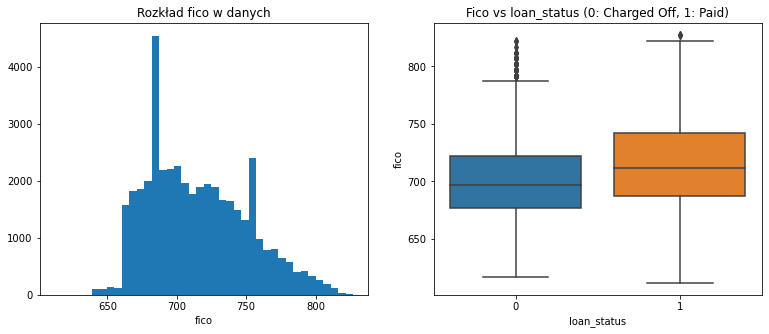

In [128]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr.fico, bins=40)
plt.xlabel('fico')
plt.title('Rozkład fico w danych')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr, x = 'loan_status', y='fico')
plt.title('Fico vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [129]:
# Odpowiedź 2a: pożyczkobiorcy którzy nie spłacali charakteryzują sie mniejszym FICO - do sprawdzenia TEST STATYSTYCZNY

In [130]:
# t-test ind. Hipoteza zero  - średnie w grupach są takie same 
data0 = ldskr[ldskr['loan_status']== 0]['fico']
data1 = ldskr[ldskr['loan_status']== 1]['fico']

from scipy.stats import ttest_ind
stat, p = ttest_ind(data0, data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Prawdopodobnie taka sama średnia')
else:
    print('Prawdopodobnie inna średnia')

stat=-29.556, p=0.000
Prawdopodobnie inna średnia


## 2b Wiek kredytowy

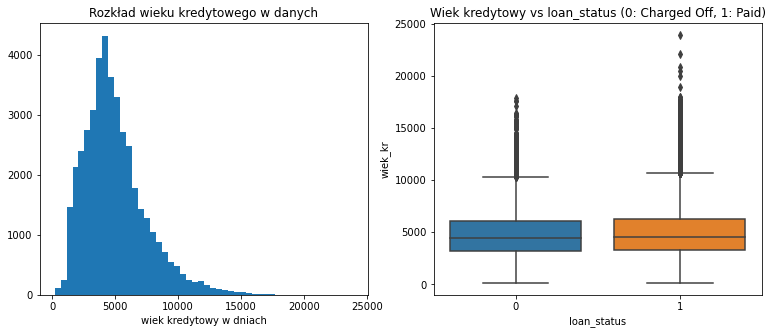

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr.wiek_kr, bins=50)
plt.xlabel('wiek kredytowy w dniach')
plt.title('Rozkład wieku kredytowego w danych')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr, x = 'loan_status', y='wiek_kr')
plt.title('Wiek kredytowy vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [132]:
# Odpowiedź 2b: nie widać istotnej róznicy - czy wiek kredytowy na wpływ na spłacalność - do sprawdzenia TEST STATYSTYCZNY

In [133]:
# t-test ind. Hipoteza zero  - średnie w grupach są takie same 
data0 = ldskr[ldskr['loan_status']== 0]['wiek_kr']
data1 = ldskr[ldskr['loan_status']== 1]['wiek_kr']

from scipy.stats import ttest_ind
stat, p = ttest_ind(data0, data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Prawdopodobnie taka sama średnia')
else:
    print('Prawdopodobnie inna średnia')

stat=-4.545, p=0.000
Prawdopodobnie inna średnia


In [134]:
ldskr.wiek_kr.corr(ldskr.fico)
# korelacja wiek_kr vs fico  0.25 - jest ale niewielka

0.24798701321017932

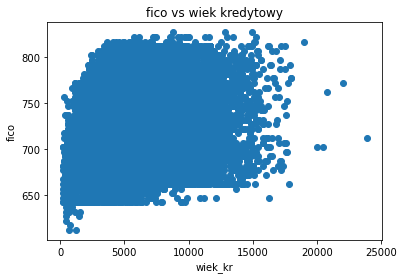

In [135]:
plt.scatter(ldskr.wiek_kr, ldskr.fico)
plt.xlabel('wiek_kr')
plt.ylabel('fico')
plt.title ('fico vs wiek kredytowy')
plt.show()

In [136]:
# Odpowiedź 2b: jest pewna korelacja między FICO a wiekiem kredytowym, ale niewielka

## 2c Status kredytu hipotecznego

In [137]:
# przyjmuję STATUS KREDYTU HIPOTECZNEGO jako 'home_ownership'=='MORTGAGE', przypisana wartośc '4'

In [138]:
ldskr.home_ownership.value_counts()
# taki status ('4') ma ok 44% osób w zbiorze danych - możemy podzielić bazę na 2 częsci - osoby z hipoteką ('mortg') 
#     i bez ('other')

3    20181
4    18959
5     3251
2      136
1        4
Name: home_ownership, dtype: int64

In [139]:
mortg = ldskr[ldskr['home_ownership']==4]

In [140]:
#mortg.head()
#mortg.shape
mortg.loan_status.value_counts()

1    16260
0     2699
Name: loan_status, dtype: int64

In [141]:
other = ldskr[ldskr['home_ownership']!=4]

In [142]:
#other.head()
#other.shape
other.loan_status.value_counts()

1    19840
0     3732
Name: loan_status, dtype: int64

In [143]:
set = ['mortg', 'other']
r=[0,1]
totals = [18959, 23572]
zero = [2699,3732]
one = [16260,19840]
redbars = [i/j*100 for i,j in zip(zero, totals)]
greenbars = [i/j*100 for i,j in zip(one, totals)]          

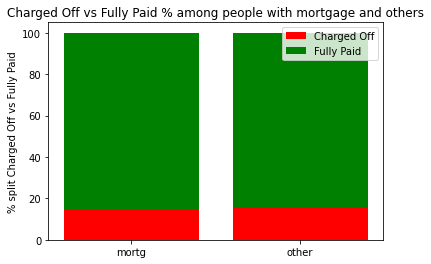

In [144]:
plt.bar(r, redbars, color = 'red')
plt.bar(r, greenbars, bottom = redbars, color = 'green')
plt.xticks(r, set)
plt.ylabel('% split Charged Off vs Fully Paid')
plt.title('Charged Off vs Fully Paid % among people with mortgage and others')
plt.legend(['Charged Off','Fully Paid'])
plt.show()

In [145]:
# Odpowiedź 2c: brak wyraźnego związku między statusem kredytu hipotecznego a spłacalnością

In [146]:
# Chi-squared test podobne proporcje
# Hipoteza zero - rozkład loan_status w oby grupach (mortg i other) jest rózny (is independent)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# Contingency table
table = [[2699, 16260],
          [3732, 19840]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# Intrepretacja przez test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0) - rozkład jest taki sam')
else:
    print('Independent (fail to reject H0)')

# Interpretacja przez p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0) - rozkład jest taki sam')
else:
    print('Independent (fail to reject H0)')

[[2699, 16260], [3732, 19840]]
dof=1
[[ 2866.74023653 16092.25976347]
 [ 3564.25976347 20007.74023653]]
probability=0.950, critical=3.841, stat=20.740
Dependent (reject H0) - rozkład jest taki sam
significance=0.050, p=0.000
Dependent (reject H0) - rozkład jest taki sam


## 2d Roczny dochód

In [147]:
ldskr.annual_inc.describe()
# jest duża rozpiętość w dochodach - od 2 tyś do 6 mln

count    4.253100e+04
mean     6.913656e+04
std      6.409635e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [148]:
ldskr.annual_inc.sort_values()

42438       1896.0
42363       2000.0
41825       3300.0
42091       3500.0
41910       3600.0
           ...    
7268     1782000.0
23618    1900000.0
39158    2039784.0
29708    3900000.0
30176    6000000.0
Name: annual_inc, Length: 42531, dtype: float64

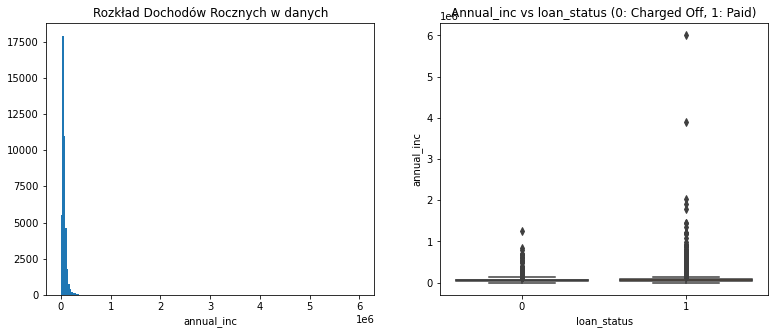

In [149]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr.annual_inc, bins=200)
plt.xlabel('annual_inc')
plt.title('Rozkład Dochodów Rocznych w danych')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr, x = 'loan_status', y='annual_inc')
plt.title('Annual_inc vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [150]:
# dwie obserwacje sa mocno podejrzane
print(ldskr[ldskr['annual_inc']>3000000])
#wygląda na pomyłkę, wątpię aby ktoś o dochodach 3,9 mln zadał sobie trud aby pożyczyć 25 tyś

       loan_amnt  term  int_rate  installment  grade  sub_grade_num  \
29708    25000.0    60     10.62       334.08      6              7   
30176     5000.0    36     12.73       167.84      5             10   

       emp_length  home_ownership  annual_inc  verification_status  ...   dti  \
29708         3.0               4   3900000.0                    1  ...  0.20   
30176        10.0               4   6000000.0                    2  ...  0.01   

       delinq_2yrs   fico  wiek_kr  inq_last_6mths  open_acc  pub_rec  \
29708          0.0  777.0     3926             3.0      12.0      0.0   
30176          0.0  712.0     3407             1.0       2.0      0.0   

       revol_bal  total_acc  pub_rec_bankruptcies  
29708     3270.0       32.0                   0.0  
30176     1434.0       10.0                   0.0  

[2 rows x 23 columns]


In [151]:
# usuwam te dwie odstające obserwacje
ldskr = ldskr[ldskr['annual_inc'] < 3000000]

In [152]:
ldskr.shape

(42529, 23)

In [153]:
# możemy spróbować powtórzyć analzę dla mniejszego zbioru, po odrzuceniu skrajnych wartości, np średnia +/- odchylenie std

In [154]:
low = ldskr.annual_inc.mean() - ldskr.annual_inc.std()

In [155]:
high = ldskr.annual_inc.mean() + ldskr.annual_inc.std()

In [156]:
print(low, high)

14719.404799038552 123094.64590095455


In [157]:
ldskr_mid = ldskr[(ldskr['annual_inc']>low) & (ldskr['annual_inc']<high)]

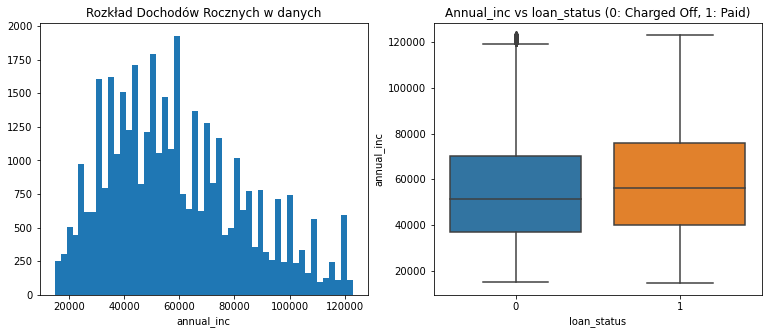

In [158]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr_mid.annual_inc, bins=50)
plt.xlabel('annual_inc')
plt.title('Rozkład Dochodów Rocznych w danych')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr_mid, x = 'loan_status', y='annual_inc')
plt.title('Annual_inc vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [159]:
# Odpowiedź 2d: pożyczkobiorcy którzy nie spłacali charakteryzują sie mniejszym średnim dochodem 
#     - do sprawdzenia TEST STATYSTYCZNY

In [160]:
# t-test ind. Hipoteza zero  - średnie w grupach są takie same 
data0 = ldskr_mid[ldskr_mid['loan_status']== 0]['annual_inc']
data1 = ldskr_mid[ldskr_mid['loan_status']== 1]['annual_inc']

from scipy.stats import ttest_ind
stat, p = ttest_ind(data0, data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Prawdopodobnie taka sama średnia')
else:
    print('Prawdopodobnie inna średnia')

stat=-12.247, p=0.000
Prawdopodobnie inna średnia


In [161]:
#ldskr_mid.shape

In [162]:
#ldskr_mid.to_csv(r'C:\\Users\zbigp\Downloads\ldskr_mid.csv', index=False)

## 2e Historia zatrudnienia

In [163]:
# bierzemy pod uwagę dane z kolumny 'emp_length' - długość zatrudnienia w latach

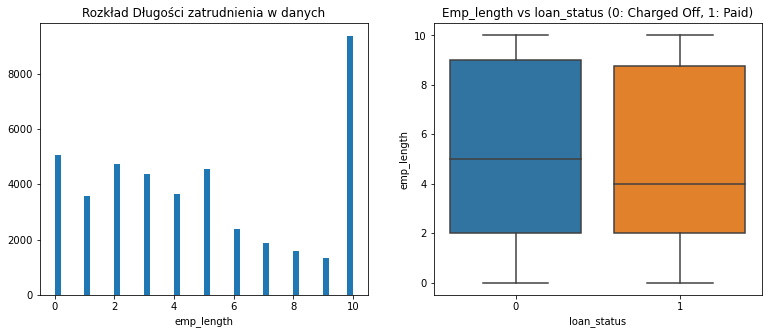

In [164]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr.emp_length, bins=50)
plt.xlabel('emp_length')
plt.title('Rozkład Długości zatrudnienia w danych')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr, x = 'loan_status', y='emp_length')
plt.title('Emp_length vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [165]:
# Odpowiedź 2e: pożyczkobiorcy którzy nie spłacali charakteryzują sie dłuższym stażem zatrudnienia 
#     - do sprawdzenia TEST STATYSTYCZNY

## 2f Wielkość pożyczki

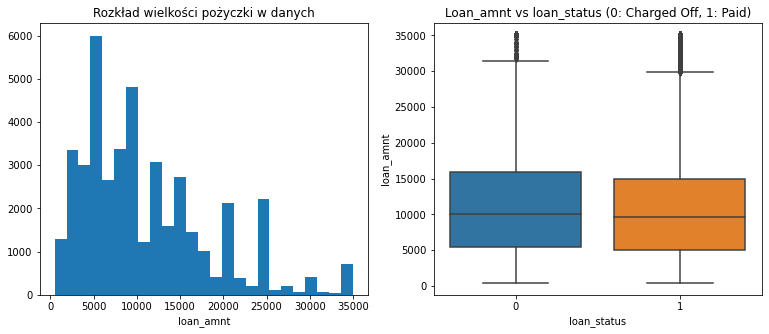

In [166]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr.loan_amnt, bins=25)
plt.xlabel('loan_amnt')
plt.title('Rozkład wielkości pożyczki w danych')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr, x = 'loan_status', y='loan_amnt')
plt.title('Loan_amnt vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [167]:
# Odpowiedź 2f: pożyczkobiorcy którzy nie spłacali charakteryzują sie minimalnie większa kwotą pożyczki 
#     - do sprawdzenia TEST STATYSTYCZNY

In [168]:
# sprawdzenie korelacji między zmiennymi
corr=abs(ldskr.corr()).T

In [169]:
corr

,loan_amnt,term,int_rate,installment,grade,sub_grade_num,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,fico,wiek_kr,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.355569,0.292335,0.930902,0.256497,0.266460,0.156165,0.112781,0.325633,0.411157,...,0.061150,0.032571,0.133319,0.212624,0.030331,0.176469,0.051473,0.254289,0.256811,0.035287
term,0.355569,1.000000,0.428655,0.097576,0.380910,0.389566,0.115579,0.077386,0.050150,0.262340,...,0.075709,0.001674,0.000129,0.089792,0.012753,0.045558,0.005164,0.029474,0.094908,0.015258
int_rate,0.292335,0.428655,1.000000,0.271395,0.939147,0.950583,0.000284,0.059064,0.064608,0.194287,...,0.118299,0.154784,0.702564,0.112690,0.179447,0.024673,0.100436,0.081816,0.031619,0.084925
installment,0.930902,0.097576,0.271395,1.000000,0.244163,0.251819,0.126549,0.086545,0.331062,0.354188,...,0.050896,0.019916,0.064490,0.179592,0.010850,0.175313,0.045697,0.264804,0.233820,0.032515
grade,0.256497,0.380910,0.939147,0.244163,1.000000,0.980992,0.012192,0.055051,0.062962,0.154148,...,0.109755,0.163755,0.689728,0.113570,0.216511,0.033243,0.098968,0.084783,0.025456,0.079023
sub_grade_num,0.266460,0.389566,0.950583,0.251819,0.980992,1.000000,0.014713,0.056578,0.065670,0.160482,...,0.114796,0.165031,0.706141,0.119565,0.223508,0.035623,0.101015,0.089519,0.025292,0.080362
emp_length,0.156165,0.115579,0.000284,0.126549,0.012192,0.014713,1.000000,0.212597,0.133319,0.097796,...,0.056224,0.012303,0.088940,0.292460,0.020304,0.097982,0.059072,0.124308,0.207389,0.060582
home_ownership,0.112781,0.077386,0.059064,0.086545,0.055051,0.056578,0.212597,1.000000,0.142654,0.035224,...,0.006551,0.014054,0.146242,0.238205,0.042957,0.147740,0.019439,0.136495,0.234112,0.022709
annual_inc,0.325633,0.050150,0.064608,0.331062,0.062962,0.065670,0.133319,0.142654,1.000000,0.148796,...,0.132737,0.027459,0.058914,0.227560,0.030880,0.202046,0.018335,0.337797,0.292378,0.016434
verification_status,0.411157,0.262340,0.194287,0.354188,0.154148,0.160482,0.097796,0.035224,0.148796,1.000000,...,0.069962,0.000948,0.018945,0.109966,0.037093,0.081637,0.012997,0.100490,0.119743,0.004481


<AxesSubplot:>

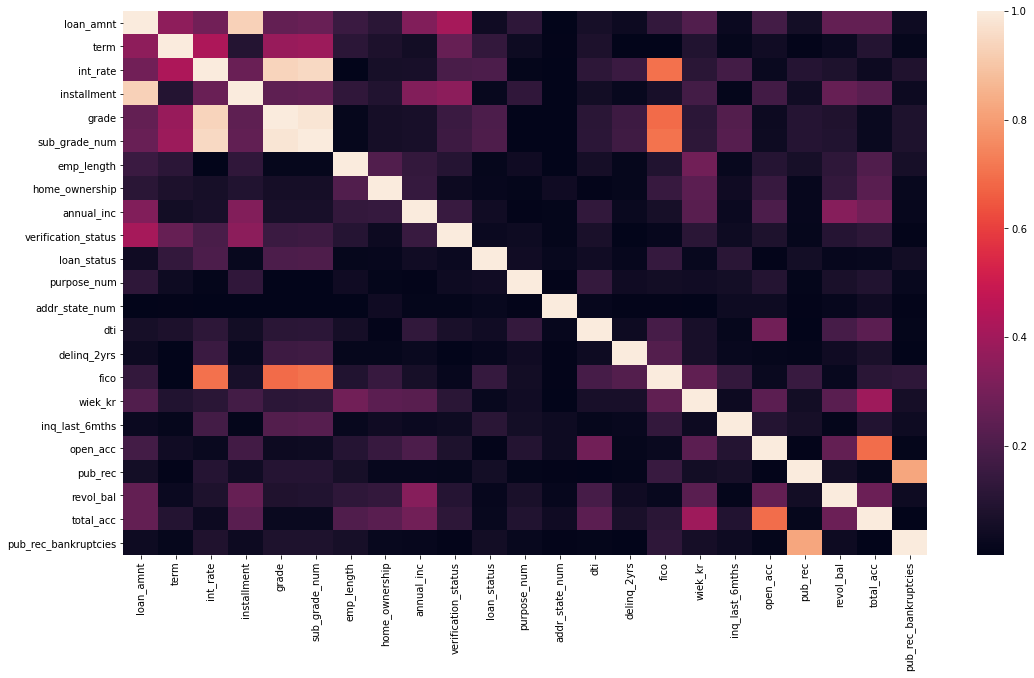

In [170]:
plt.figure(figsize=(18,10))
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [171]:
# nie widać wiodącego parametru który byłby mocno skorelowany ze statusem pożyczki. Raczej jest to suma kilku mniejszych 
## elementów, a największym stopniu: grade, sub-grade, int_rate, fico oraz term

# 3. FEATURE ENGINEERING

UTWORZENIE NOWYCH ZMIENNYCH

In [173]:
# w punkcie 1 podczas obróbki danych wyselekcjonowałem już najbardziej istotne i wiarygodne zmienne do dalszych pracy
## utworzyłem nowe zmienne 'wiek kredytowy oraz 'FICO'

In [174]:
# tworzę nową zmienną  - kwota pozyczki do kwoty dochodów
ldskr['loan_inc_ratio'] = ldskr.loan_amnt*100 / ldskr.annual_inc

In [175]:
# sprawdzam korelację
ldskr.loan_inc_ratio.corr(ldskr.loan_status)

-0.09902498295771173

<ipython-input-176-c37680d7ca98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldskr_mid['loan_inc_ratio'] = ldskr_mid.loan_amnt*100 / ldskr_mid.annual_inc


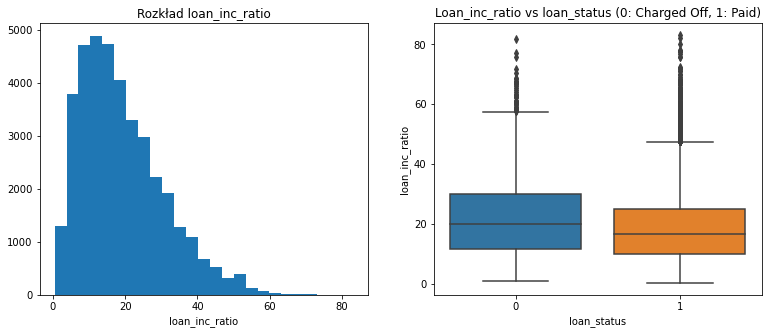

In [176]:
ldskr_mid['loan_inc_ratio'] = ldskr_mid.loan_amnt*100 / ldskr_mid.annual_inc
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr_mid.loan_inc_ratio, bins=25)
plt.xlabel('loan_inc_ratio')
plt.title('Rozkład loan_inc_ratio')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr_mid, x = 'loan_status', y='loan_inc_ratio')
plt.title('Loan_inc_ratio vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [177]:
# tworze nową zmienną - roczna suma spłat do rocznego dochodu
ldskr['inst_inc_ratio'] = (ldskr.installment*12*ldskr.int_rate*100)/ldskr.annual_inc

In [178]:
# sprawdzam korelację
ldskr.inst_inc_ratio.corr(ldskr.loan_status)

-0.14707315761262618

<ipython-input-179-136bd319de6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldskr_mid['inst_inc_ratio'] = (ldskr_mid.installment*12*ldskr_mid.int_rate*100)/ldskr_mid.annual_inc


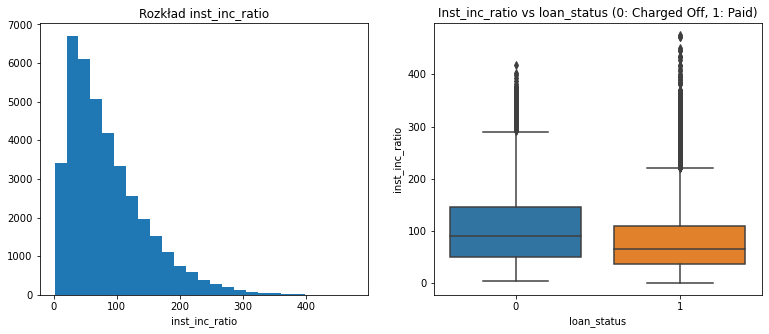

In [179]:
ldskr_mid['inst_inc_ratio'] = (ldskr_mid.installment*12*ldskr_mid.int_rate*100)/ldskr_mid.annual_inc
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(ldskr_mid.inst_inc_ratio, bins=25)
plt.xlabel('inst_inc_ratio')
plt.title('Rozkład inst_inc_ratio')
plt.subplot(1,3,2)
sns.boxplot(data = ldskr_mid, x = 'loan_status', y='inst_inc_ratio')
plt.title('Inst_inc_ratio vs loan_status (0: Charged Off, 1: Paid)')
plt.show()

In [180]:
#ldskr.grade.corr(ldskr.sub_grade_num)
# pominę kolumnę sub_grade, gdyż zawiera informacje wtórne do grade

In [181]:
# usunę kilka kolumn o najmniejszej korelacji
ldskr.drop(['sub_grade_num','emp_length','home_ownership', 'addr_state_num','open_acc'],
           axis=1, inplace=True)

In [182]:
ldskr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42529 entries, 0 to 42535
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42529 non-null  float64
 1   term                  42529 non-null  int64  
 2   int_rate              42529 non-null  float64
 3   installment           42529 non-null  float64
 4   grade                 42529 non-null  int64  
 5   annual_inc            42529 non-null  float64
 6   verification_status   42529 non-null  int64  
 7   loan_status           42529 non-null  int64  
 8   purpose_num           42529 non-null  int32  
 9   dti                   42529 non-null  float64
 10  delinq_2yrs           42529 non-null  float64
 11  fico                  42529 non-null  float64
 12  wiek_kr               42529 non-null  int64  
 13  inq_last_6mths        42529 non-null  float64
 14  pub_rec               42529 non-null  float64
 15  revol_bal          

In [183]:
# tworzę dummy variables
ldskrn = pd.get_dummies(ldskr, columns =['term','grade', 'verification_status', 'purpose_num'],drop_first = True)

In [190]:
ldskrn.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico,wiek_kr,inq_last_6mths,...,purpose_num_4,purpose_num_5,purpose_num_6,purpose_num_7,purpose_num_8,purpose_num_9,purpose_num_10,purpose_num_11,purpose_num_12,purpose_num_13
0,5000.0,10.65,162.87,24000.0,1,27.65,0.0,737.0,9830,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,30000.0,0,1.00,0.0,742.0,4627,5.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,12252.0,1,8.72,0.0,737.0,3682,2.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,339.31,49200.0,1,20.00,0.0,692.0,5782,1.0,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,12.69,67.79,80000.0,1,17.94,0.0,697.0,5813,0.0,...,0,0,0,0,0,1,0,0,0,0


EKSPORT FINALNEGO PLIKU PO OBRÓBCE DANYCH I FE

In [191]:
# Eksport finalnego pliku ## UWAGA ## będzie potrzebny w cześci drugiej projektu !!!
ldskrn.to_csv(r'C:\\Users\zbigp\Downloads\ldskrn.csv', index=False)

 ## KONIEC CZĘŚCI PIERWSZEJ